In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# 히트맵의 x축, y축 리스트 생성
x = np.full(6,0)
y = np.array([0,1,2,3,4,5])
temp = np.array([0,1,2,3,4,5])
for i in range(1,6):
    x = np.append(x, np.full(6,i))
    y = np.append(y, temp)

In [5]:
# 형용사에 인덱싱한 파일 불러오기
df = pd.read_csv('./data/heatmaps/celeb_adjectives.csv', encoding='utf-8', header=None)
df = df.drop(2, axis=1)
df = df.drop(3, axis=1)
df = df.dropna(axis=0)
df.head()

,0,1
0,가녀린,"0,3"
11,가뿐한,"5,2"
15,강력하고,"2,5"
16,강력하네,"2,5"
17,강력한,"2,5"


In [6]:
# index를 x와 y로 파싱하여 리스트에 저장
x_vals = []
y_vals = []
xy = df[1].values
for val in xy:
    x_vals.append(val[0])
    y_vals.append(val[-1])   
adj = df[0].values

In [9]:
# adj_list: list[ dict{adj: <String>, x:<int>, y:<int>} ]
adj_list = np.array([])

for i in range(len(adj)):
    temp_dict = {}
    temp_dict['adj'] = adj[i]
    temp_dict['x'] = int(x_vals[i])
    temp_dict['y'] = int(y_vals[i])
    adj_list = np.append(adj_list, temp_dict)

print(adj_list)

[{'adj': '가녀린', 'x': 0, 'y': 3} {'adj': '가뿐한', 'x': 5, 'y': 2}
 {'adj': '강력하고', 'x': 2, 'y': 5} {'adj': '강력하네', 'x': 2, 'y': 5}
 {'adj': '강력한', 'x': 2, 'y': 5} {'adj': '강력할', 'x': 2, 'y': 5}
 {'adj': '강력해진', 'x': 2, 'y': 5} {'adj': '강력히', 'x': 2, 'y': 5}
 {'adj': '강렬하게', 'x': 2, 'y': 5} {'adj': '강렬하다', 'x': 2, 'y': 5}
 {'adj': '강렬하며', 'x': 2, 'y': 5} {'adj': '강렬한', 'x': 2, 'y': 5}
 {'adj': '강렬해', 'x': 2, 'y': 5} {'adj': '강렬해진', 'x': 2, 'y': 5}
 {'adj': '강한', 'x': 2, 'y': 5} {'adj': '강해', 'x': 2, 'y': 5}
 {'adj': '강해져야', 'x': 2, 'y': 5} {'adj': '강해졌고', 'x': 2, 'y': 5}
 {'adj': '강했다', 'x': 2, 'y': 5} {'adj': '건강하게', 'x': 2, 'y': 1}
 {'adj': '건강하고', 'x': 2, 'y': 1} {'adj': '건강한', 'x': 2, 'y': 1}
 {'adj': '건강할', 'x': 2, 'y': 1} {'adj': '건강함의', 'x': 2, 'y': 1}
 {'adj': '건강히', 'x': 2, 'y': 1} {'adj': '건전한', 'x': 4, 'y': 3}
 {'adj': '견고한', 'x': 2, 'y': 5} {'adj': '견고해진', 'x': 2, 'y': 5}
 {'adj': '경쾌하게', 'x': 0, 'y': 1} {'adj': '고급스러운', 'x': 4, 'y': 3}
 {'adj': '고운', 'x': 3, 'y': 3} {'adj': '곱

# 히트맵 그리기

In [13]:
from collections import Counter
from konlpy.tag import Okt
import os

In [12]:
# 2. 배열 news에 전체댓글을 다시저장(한줄씩)
def create_adj_list(text_file):
    f = open('./data/stars/' + text_file, 'r', encoding='utf-8')
    
    lines = f.readlines()
    news = []

    for line in lines:
        news.append(line)

    f.close()
    
    # 3. 트윗터 패키지 안에 konlpy 모듈호출
    twitter = Okt()

    # 각 문장별로 형태소 구분하기
    sentences_tag = []
    for sentence in news:
        # morpth - 형태소별로 나눠져서 저장됨.
        morph = twitter.pos(sentence)
        sentences_tag.append(morph)


    # 형용사인 품사만 선별해 리스트에 담기 ( 명사도 포함해도 괜찮을듯? 아닌가?)
    adjs = []
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            # 형용사인것만 adj_list에 담겠다.
            if tag in ['Adjective']:
                adjs.append(word)


    counts = Counter(adjs)
    return counts

In [14]:
# font 문제
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
#print(font_list)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'
# font 크기 조절
plt.rcParams['font.size'] = 15

### 15명의 연예인에 대해 히트맵 그리기

In [15]:
stars = os.listdir('./data/stars/')
if '.DS_Store' in stars:
    stars.remove('.DS_Store')

print(stars, len(stars))


['선미.txt', '설현.txt', '김희정.txt', '클라라.txt', '이하늬.txt', '유이.txt', '효린.txt', '소유.txt', '가희.txt', '루나.txt', '이시영.txt', '유리.txt', '조여정.txt', '제시.txt', '이효리.txt'] 15


선미.txt
설현.txt
김희정.txt
클라라.txt
이하늬.txt
유이.txt
효린.txt
소유.txt
가희.txt
루나.txt
이시영.txt
유리.txt
조여정.txt
제시.txt
이효리.txt


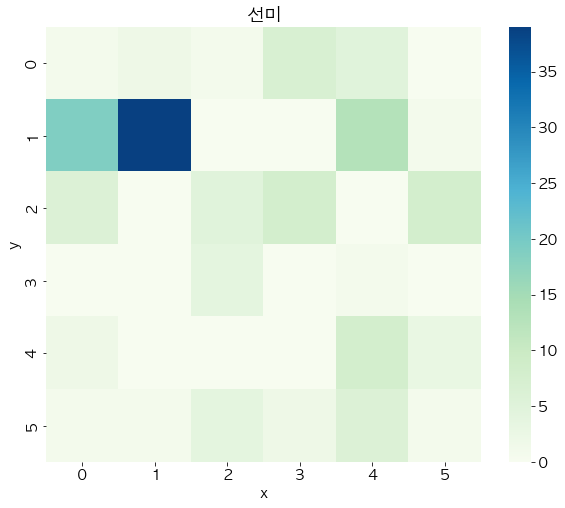

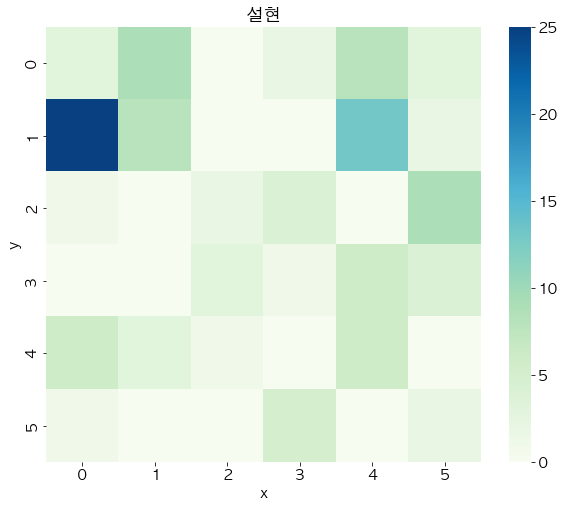

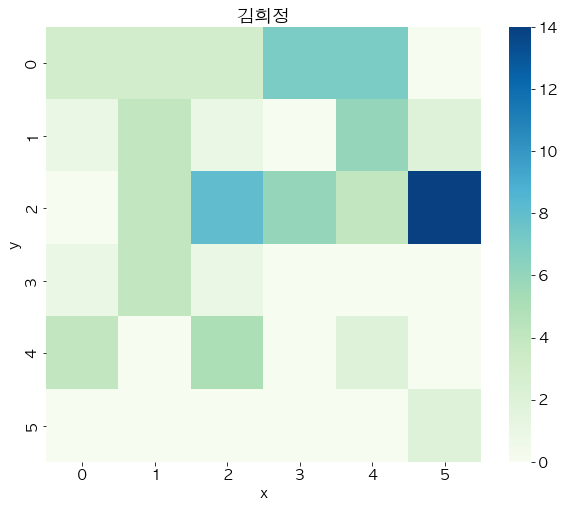

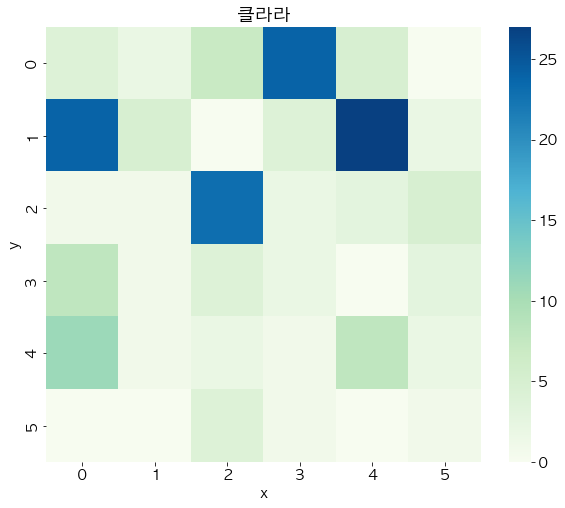

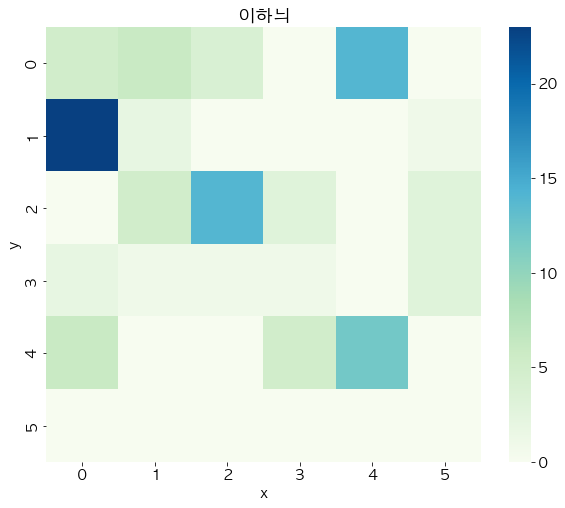

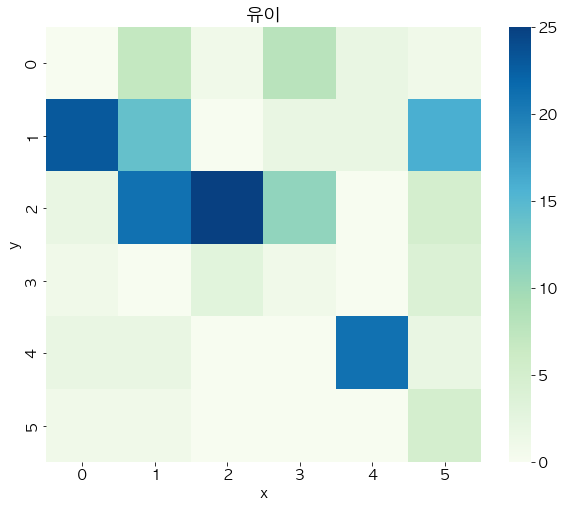

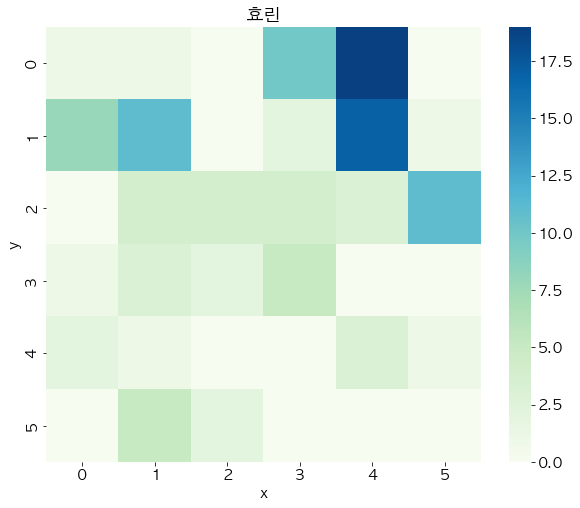

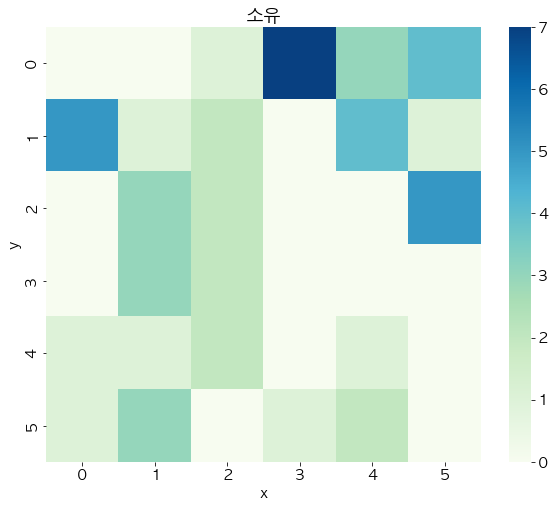

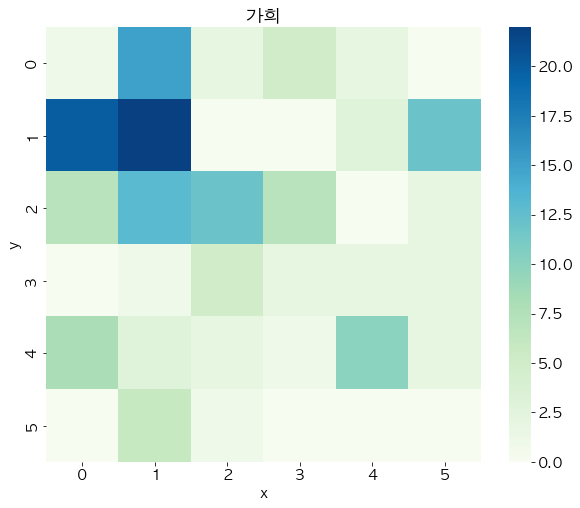

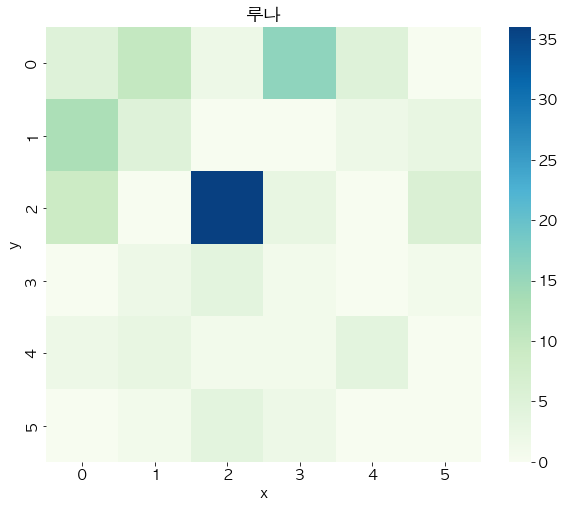

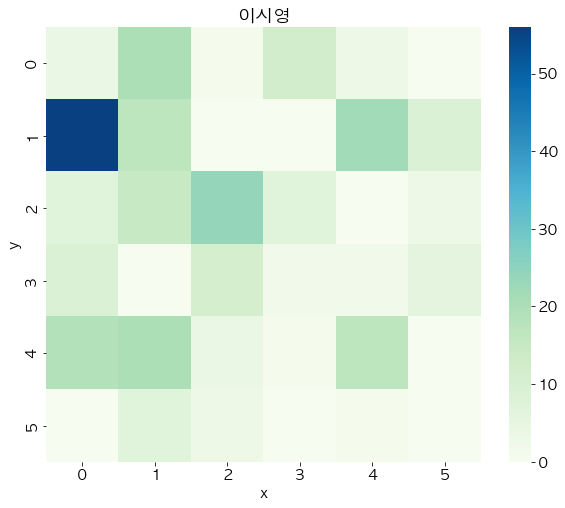

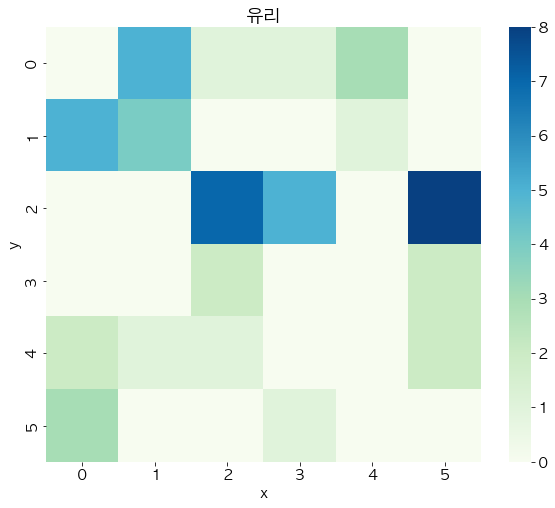

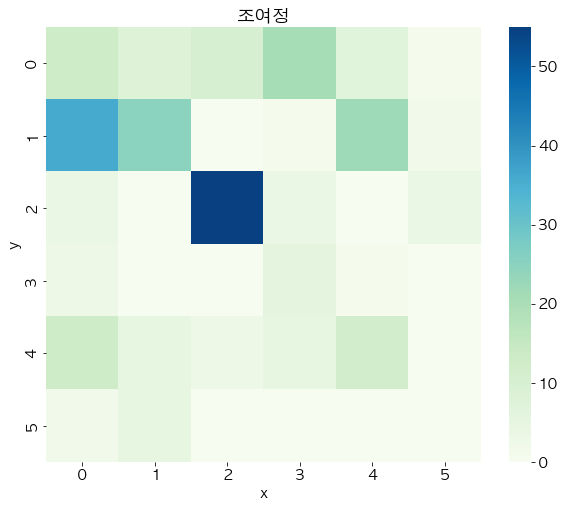

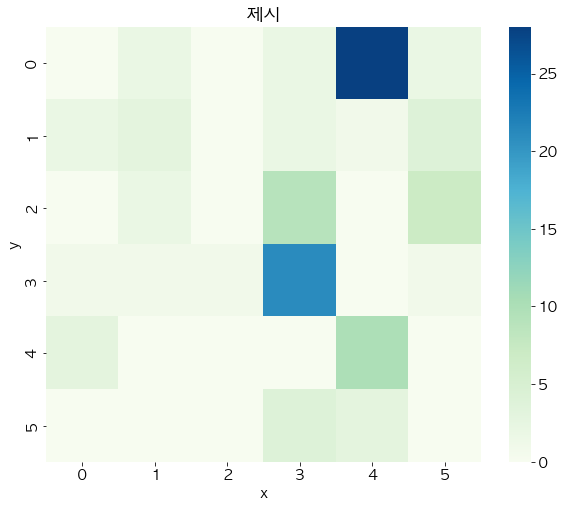

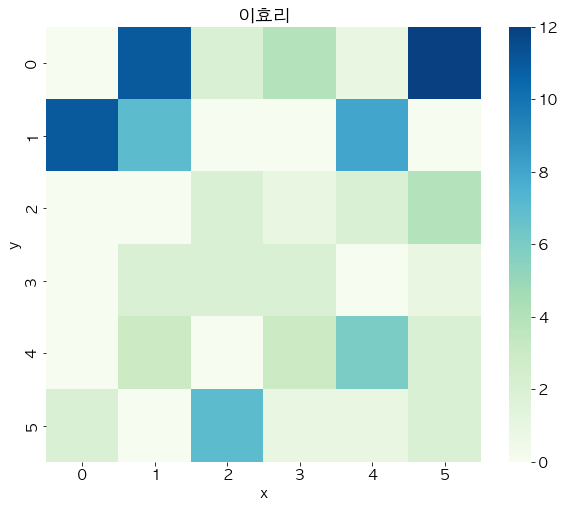

In [20]:
#====== 15명 전부 생성 =======#

for star in stars:
    star_name = star[:star.rfind('.txt')]
    # 해당 연예인의 기사에서 형용사만 추출하여 {형용사:횟수} 리스트 받아오기
    adj_counts = create_adj_list(star)
    # val: 히트맵의 value값이 될 리스트
    print(star)
    val = np.zeros(36)
    for item in adj_list:
        num = adj_counts.get(item['adj'])
        if not num == None:
            # 형용사의 인덱스 자리에 count
            index = item['y']*6 + item['x']
            val[index] = val[index]+num
    
    # 히트맵 만들기
    data = pd.DataFrame()
    data['x'] = x
    data['y'] = y
    data['value'] = val

    pivot = data.pivot('y','x','value')
    
    plt.figure(figsize=(10, 8)) 
    plt.title(star_name)

    hm = sns.heatmap(pivot, cmap='GnBu', annot=False, square=True)
    fig = hm.get_figure()
    
    # 저장 경로 지정
    fig.savefig('./data/heatmaps/heatmap_v2_'+star_name)
    